In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd
df=pd.read_table('pseudo_facebook.tsv')
df.tail(10)

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
98993,1654565,19,15,1994,8,male,394.0,4538,4144,4501,15088,4435,5961,66,9127
98994,2063006,20,4,1993,1,female,402.0,1988,332,7351,106025,7248,73333,103,32692
98995,1132164,20,9,1993,10,female,699.0,3611,973,4507,7768,4414,6909,93,859
98996,1668695,24,25,1989,4,female,182.0,2938,1272,6018,17765,5843,11708,175,6057
98997,1458985,28,14,1985,12,female,290.0,2218,1618,4626,10268,4290,4250,336,6018
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756
99002,1397896,39,15,1974,5,female,397.0,2049,768,9410,12443,9410,9530,0,2913


##### Total Data Columns summary

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   98828 non-null object
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 11.3+ MB


The data frame has 15 columns, out of 15 only gender has missed 175 values.

###### Analysis of missing values

In [17]:
#missing gender values are being replace by mode of gender

df['gender'].fillna(df['gender'].mode()[0],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   99003 non-null object
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 11.3+ MB


#### Addition of new column

In [79]:
df['mobileTotallikes']=df['mobile_likes']+df['mobile_likes_received']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 16 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   98828 non-null object
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
mobileTotallikes         99003 non-null int64
dtypes: float64(1), int64(14), object(1)
memory usage: 12.1+ MB


##### Cleaning Data by removing of outliers

In [5]:
ageOutliers=[]
O_indices=[]
q1=np.percentile(df['age'],25)
q3=np.percentile(df['age'],75)
IQR = (q3-q1)*1.5
ageOutliers=df[((df['age']>q3+IQR) | (df['age'] < q1-IQR))]
O_indices=ageOutliers.index
df1=df.drop(df.index[O_indices])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94689 entries, 0 to 99002
Data columns (total 15 columns):
userid                   94689 non-null int64
age                      94689 non-null int64
dob_day                  94689 non-null int64
dob_year                 94689 non-null int64
dob_month                94689 non-null int64
gender                   94569 non-null object
tenure                   94688 non-null float64
friend_count             94689 non-null int64
friendships_initiated    94689 non-null int64
likes                    94689 non-null int64
likes_received           94689 non-null int64
mobile_likes             94689 non-null int64
mobile_likes_received    94689 non-null int64
www_likes                94689 non-null int64
www_likes_received       94689 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 11.6+ MB


##### Age column converting into age groups

In [81]:
indices=[]
tIndices=[]
yIndices=[]
adIndices=[]
adltIndices=[]
sIndices=[]
for index, row in df1.iterrows():
    if row['age']<=14:
        indices.append(index)
    elif row['age']>14 and row['age']<=19:
        tIndices.append(index)
    elif row['age']>19 and row['age']<=25:
        yIndices.append(index)
    elif row['age']>25 and row['age']<=30:
        adIndices.append(index)
    elif row['age']>30 and row['age']<=60:
        adltIndices.append(index)
    else:
        sIndices.append(index)
    

Categorically age has been grouped into children, teenagers, youngsters, adolescents, adults and senior citizen based on some assumptions.

# Facebook usages and its app by age groups analysis

In [82]:
childernData = pd.DataFrame(df1.ix[indices], columns = df1.keys()).reset_index(drop=True)
teenagersData = pd.DataFrame(df1.ix[tIndices], columns = df1.keys()).reset_index(drop=True)
youthData = pd.DataFrame(df1.ix[yIndices], columns = df1.keys()).reset_index(drop=True)
adolescentsData = pd.DataFrame(df1.ix[adIndices], columns = df1.keys()).reset_index(drop=True)
adltsData = pd.DataFrame(df1.ix[adltIndices], columns = df1.keys()).reset_index(drop=True)
sData = pd.DataFrame(df1.ix[sIndices], columns = df1.keys()).reset_index(drop=True)

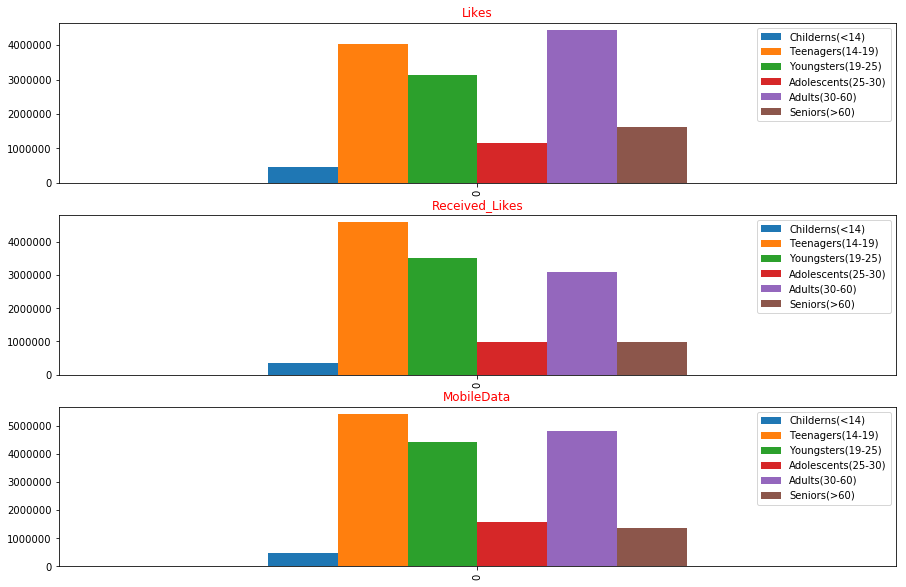

In [83]:
fig, axes = plt.subplots(nrows=3,ncols=1,figsize=(15,10))
moreLikes = [[childernData.likes.sum(),teenagersData.likes.sum(),youthData.likes.sum(),adolescentsData.likes.sum(),adltsData.likes.sum(),sData.likes.sum()]]
userAgegroup = ['Childerns(<14)','Teenagers(14-19)','Youngsters(19-25)','Adolescents(25-30)','Adults(30-60)','Seniors(>60)']
MorelikesuserData = pd.DataFrame(moreLikes,columns=userAgegroup)
MorelikesuserData.plot.bar(ax=axes[0])
axes[0].set_title('Likes',color='r')
moreReceivedlikes = [[childernData.likes_received.sum(),teenagersData.likes_received.sum(),youthData.likes_received.sum(),adolescentsData.likes_received.sum(),adltsData.likes_received.sum(),sData.likes_received.sum()]]
userAgegroup = ['Childerns(<14)','Teenagers(14-19)','Youngsters(19-25)','Adolescents(25-30)','Adults(30-60)','Seniors(>60)']
MorereceivedlikesuserData = pd.DataFrame(moreReceivedlikes,columns=userAgegroup)
MorereceivedlikesuserData.plot.bar(ax=axes[1])
axes[1].set_title('Received_Likes',color='r')
mobileUsageData = [[childernData.mobileTotallikes.sum(),teenagersData.mobileTotallikes.sum(),youthData.mobileTotallikes.sum(),adolescentsData.mobileTotallikes.sum(),adltsData.mobileTotallikes.sum(),sData.mobileTotallikes.sum()]]
userAgegroup = ['Childerns(<14)','Teenagers(14-19)','Youngsters(19-25)','Adolescents(25-30)','Adults(30-60)','Seniors(>60)']
mobileUsageDataDf = pd.DataFrame(mobileUsageData,columns=userAgegroup)
mobileUsageDataDf.plot.bar(ax=axes[2])
axes[2].set_title('MobileData',color='r')

More likes were being doing by adults and followed by teenagers.At the same time ,Children’s have been done low likes.
More likes received by teenagers and followed by youngsters.At the same time ,Children’s have been received less likes.
Mostly teenagers have been used and very few childerns were used facebook on mobile.

### Gender facebook usage analysis

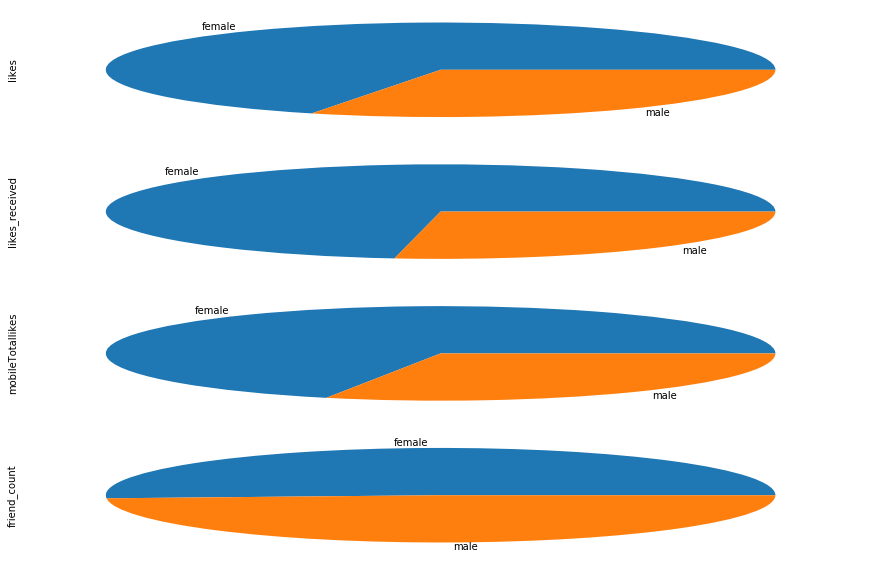

In [84]:
fig,axes=plt.subplots(figsize=(15,10),nrows=4,ncols=1)
doLikes = df1.groupby(['gender'])['likes'].sum()
doLikes.plot.pie(ax=axes[0])
ReceivedLikes = df1.groupby(['gender'])['likes_received'].sum()
ReceivedLikes.plot.pie(ax=axes[1])
MobileUsage=df1.groupby(['gender'])['mobileTotallikes'].sum()
MobileUsage.plot.pie(ax=axes[2])
friendsCount=df1.groupby(['gender'])['friend_count'].sum()
friendsCount.plot.pie(ax=axes[3])

Doing more likes,Receiving more likes,mobile facebook app usage and friend count also more females compare with males.
Hence Mostly facebook usage is more females than males. 

#### Date Of Birth Anlaysis

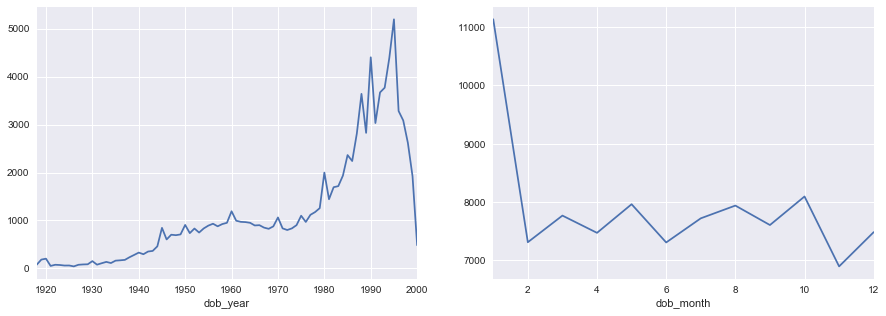

In [15]:
%matplotlib inline
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
df1.groupby(['dob_year'])['userid'].count().plot(ax=axes[0])
df1.groupby(['dob_month'])['userid'].count().plot(ax=axes[1])

As shown in figure, likely who born after 1988 are being usage more facebook and less usage by before born 1988.
Mostly who born in January those were used peak usage of facebook , rest others months who born were very less used.  


#### Inactive Users

inactiveUsers: 21895


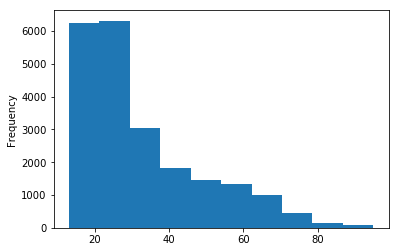

In [9]:
c=0
Indices = []
for index, row in df1.iterrows():
    if ((row['likes']==0) and (row['mobile_likes']==0)) and (row['www_likes']==0):
        c=c+1
        Indices.append(index)

df2=df1.ix[Indices]
df2.age.plot(kind='hist')
print("inactiveUsers:",c)

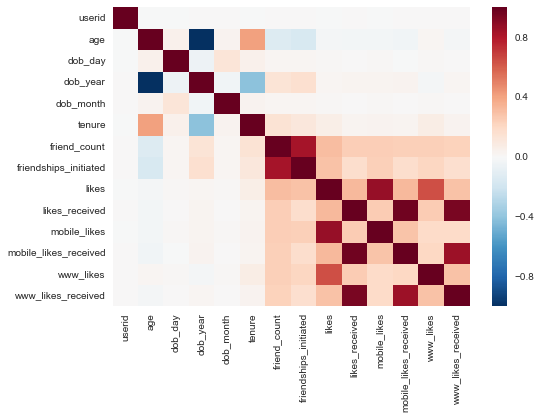

In [10]:
import seaborn as sns
sns.heatmap(df1.corr(method='pearson'))